# Overview

   The objective of the assignment is to have a thorough understanding of Reinforced Learning Algorithms and implement Temporal Difference algorithms as a part of designing agents for solving a mazing and obtain maximum win rate while playing the game of blackjack. The assignment gives the basis for when to use SARSA and when to use Q-Learning approach and helps us delineate the fine margin of difference betweem the two methodolgies based on their performance metrics.

# Maze Problem

## Problem Description

This is a typical maze that we come across in newspapers and magazines. The goal is navigate the agent from start to destination while avoiding obstacles like holes and also not leaving the grid world environment. The agent has four possible actions of moving left, right, up and down. For every move the agent makes, a reward of -1 is awarded, if the agent falls into holes or goes out of the grid world its rewarded -5 points. 30 points is awarded when the goal is reached. The aim of the problem is to develop an agent the learns to solve the maze in a more efficient way ie. by attaing the maximum possible rewards.

## Grid World Explanation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

The entire grid of the maze is mapped into a n dimensional array. 'O' denote the open/available space for the agent to move with any obstacle. H denotes the holes while G represents the goal/destination. The position of the agent within the maze at any instant of time represents the states while the movement of agent towards left, right, up or down represent the actions. A text file is fed to the grid environment as the input map. The functions read_map and print_map serve as the input and output terminals for the environment. The function check_state evaluates the step the agent has taken in the current action. The next function makes the agent take one of the four actions of left, right, up and down. The following lines of code describe the working of the program. When the output displays 30, it indicates the goal has been reached.

In [3]:
import collections

env = GridWorld('F:/grid.txt')

In [4]:
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


In [5]:
#print [2,3]
env.init([0,0])
print(env.next(3))
print(env.next(3))    
print(env.next(1))  
print(env.next(1))  
print(env.next(1))
print(env.next(3))
print(env.next(3))
print(env.next(3))
print(env.next(1))
print(env.next(1))
print(env.next(1))
#print [0,0]
#env.check_state([0,0])
#print [3,4]
#env.check_state([3,4])
#print [10,3]
#env.check_state([10,3])

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
30


In [6]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

# BlackJack

## Problem Description

Black Jack is a popular card game played in almost every casino. The game consists of a fixed dealer and a player to play against. At the beginning of the game two sets of paired cards are drawn from infinite deck of cards. The player has the privilege to view both his cards but for the dealer only one card is viewable. The aim of the game is to attain a set of cards that amount to a sum of 21 or close to 21. If the sum of cards of the player exeeds 21, then it is termed a bust and player loses the round. The player has two possible actions hit or stay. Hit action enables the player to draw a card from the deck while stay indicates the turn of the player and the dealer gets his turn. In that case, the one with highest sum that is less than 21 wins the round. There is also a special case 'the natural blackjack' where the player gets a total of 21 at the very first turn. The weightage of cards are equal as per their number while king,queen and jack all correspong to 10. Ace can be usuable i.e. either 1 or 11 depending on the user's choice.

The objective of the problem is to design a agent that can win as many rounds as possible with maximum possible rewards, where a win has a reward of +1, draw gets 0 and loss gets -1.

## GridWorld Explanation

In [111]:
import gym

from gym import spaces

from gym.utils import seeding



def cmp(a, b):

    return float(a > b) - float(a < b)



# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10

deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]





def draw_card(np_random):

    return int(np_random.choice(deck))





def draw_hand(np_random):

    return [draw_card(np_random), draw_card(np_random)]





def usable_ace(hand):  # Does this hand have a usable ace?

    return 1 in hand and sum(hand) + 10 <= 21





def sum_hand(hand):  # Return current hand total

    if usable_ace(hand):

        return sum(hand) + 10

    return sum(hand)





def is_bust(hand):  # Is this hand a bust?

    return sum_hand(hand) > 21





def score(hand):  # What is the score of this hand (0 if bust)

    return 0 if is_bust(hand) else sum_hand(hand)





def is_natural(hand):  # Is this hand a natural blackjack?

    return sorted(hand) == [1, 10]





class BlackjackEnv(gym.Env):

    """Simple blackjack environment



    Blackjack is a card game where the goal is to obtain cards that sum to as

    near as possible to 21 without going over.  They're playing against a fixed

    dealer.

    Face cards (Jack, Queen, King) have point value 10.

    Aces can either count as 11 or 1, and it's called 'usable' at 11.

    This game is placed with an infinite deck (or with replacement).

    The game starts with each (player and dealer) having one face up and one

    face down card.



    The player can request additional cards (hit=1) until they decide to stop

    (stick=0) or exceed 21 (bust).



    After the player sticks, the dealer reveals their facedown card, and draws

    until their sum is 17 or greater.  If the dealer goes bust the player wins.



    If neither player nor dealer busts, the outcome (win, lose, draw) is

    decided by whose sum is closer to 21.  The reward for winning is +1,

    drawing is 0, and losing is -1.



    The observation of a 3-tuple of: the players current sum,

    the dealer's one showing card (1-10 where 1 is ace),

    and whether or not the player holds a usable ace (0 or 1).



    This environment corresponds to the version of the blackjack problem

    described in Example 5.1 in Reinforcement Learning: An Introduction

    by Sutton and Barto (1998).

    http://incompleteideas.net/sutton/book/the-book.html

    """

    def __init__(self, natural=False):

        self.action_space = spaces.Discrete(2)

        self.observation_space = spaces.Tuple((

            spaces.Discrete(32),

            spaces.Discrete(11),

            spaces.Discrete(2)))

        self.seed()
        
        self.done = False

        self.natural = natural

        self.reset()



    def seed(self, seed=None):

        self.np_random, seed = seeding.np_random(seed)

        return [seed]



    def step(self, action):

        assert self.action_space.contains(action)

        if action:  # hit: add a card to players hand and return

            self.player.append(draw_card(self.np_random))

            if is_bust(self.player):

                self.done = True

                reward = -1

            else:

                self.done = False

                reward = 0

        else:  # stick: play out the dealers hand, and score

            self.done = True

            while sum_hand(self.dealer) < 17:

                self.dealer.append(draw_card(self.np_random))

            reward = cmp(score(self.player), score(self.dealer))

            if self.natural and is_natural(self.player) and reward == 1:

                reward = 1.5

        return self._get_obs(), reward, self.done



    def _get_obs(self):

        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))
    
    def _get_done(self):
        
        if(self.done == True):
            
            return 1
        
        else:
        
            return 0



    def reset(self):

        self.dealer = draw_hand(self.np_random)

        self.player = draw_hand(self.np_random)
        
        self.done = False

        return self._get_obs()

The above code has the various utility functions necssary for playing the game like drawing a card, to check if the player had played usable ace or if the state of the game in any particular instant. The actions correspond to hit or stay. The function step determines the next action the user is vowed to make and it returns three outputs. One is the observation which is a tuple of the sum of cards of user, sum of cards of the dealer and if the usable ace is played or not. The other two are the status of the round if it is done or not and the reward for the round. I have added function _get_done() _which converts the boolean value of status to 0 for False and 1 for True. This is done just for my convenience in state transition doesn't really affect the functioning of the code as a whole. The following lines show an example a sample round in playing black jack.

In [112]:
env1 = BlackjackEnv()

In [117]:
env1.reset()

(19, 6, True)

In [116]:
env1.step(1) # hit

((26, 8, False), -1, True)

In [118]:
env1.step(0) #stay

((19, 6, True), 1.0, True)

# Methods

## Review of SARSA and Q-Learning

SARSA stands for State-Action-Reward-State-Action. In SARSA, the agent starts in state 1, performs action 1, and gets a reward (reward 1). Now, it’s in state 2 and performs another action (action 2) and gets the reward from this state (reward 2) before it goes back and updates the value of action 1 performed in state 1. In contrast, in Q-learning the agent starts in state 1, performs action 1 and gets a reward (reward 1), and then looks and sees what the maximum possible reward for an action is in state 2, and uses that to update the action value of performing action 1 in state 1. So the difference is in the way the future reward is found. In Q-learning it’s simply the highest possible action that can be taken from state 2, and in SARSA it’s the value of the actual action that was taken. 

## Choice of TD Learning

Agent Maze - SARSA

Agent Blackjack - Q- Learning

   As explained above,we can infer that SARSA takes into account the control policy by which the agent is moving, and incorporates that into its update of action values, where Q-learning simply assumes that an optimal policy is being followed. Though the difference between both the on practical implementations they have drastic implications. Q-learning is best suited for the tasks where the policies change dynamically and that's why I have chosen it for Black Jack while SARSA performs better for the Maze. 


## Implementation

### AGENT MAZE

In [18]:
class RLAgentMaze: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, env):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1],self.n_a))
    
    
    def epsilon_greed(self, epsilon, s):
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.Q[s[0],s[1]])
    
    
    
    def train(self, start, **params):

        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        
        for j in range(maxiter):

            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)

            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)

                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))

                self.Q[s[0],s[1],a] = self.Q[s[0],s[1],a] + alpha * (r + gamma * self.Q[s1[0],s1[1],a1] - self.Q[s[0],s[1],a])
                
                if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
        
        policy = np.argmax(self.Q, axis = 2)
        for i in range(100):
            env.init(start)
            s = env.get_cur_state()
            
            trace = np.array(coord_convert(s, self.size))
            
            for step in range(maxstep):
                
                a = policy[s[0],s[1]]
                r = env.next(a)
                
                s1 = env.get_cur_state()
                trace = np.vstack((trace, coord_convert(s1, self.size)))
                
                s = s1
                if env.is_goal():
                    break
                    
        return trace

The init function plugs the agent with grid of the maze environment and initialises the number of states, actions and the Q matrix. First the agent is trained to derive a Q matrix which then while testing the agent makes use to navigate through the maze. As establshed before SARSA is used here while training and developing the Q matrix. The Q value is made zero when the goal is reached because the agent always tend to choose the path where the reward is high and the steps involved are minimum, and this condition is established when the goal is reached as it becomes the ony possible action the agent should take and thereby forcing it.

### AGENT BLACKJACK

In [158]:
class RLAgentBlackJack: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, env):
        self.env = env
        self.n_a = 2
        self.obs = (0,0,0)
        self.n_states = 882 # combination of all possible states
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.n_states,self.n_a))
    
    
    def epsilon_greed(self, epsilon, s):
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.Q[s])
    
    
    
    def train(self, start, **params):

        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        
        # online train
        # rewards and step trace
        rtrace = []
        
        win = 0
        
        draw = 0
        
        lose = 0
        
        for j in range(maxiter):

            env1.reset()
            s = env1._get_done()
            # selection an action
            
            
            rewards = []
            #trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            
            while (s == 0):
                # move
                a = self.epsilon_greed(epsilon, s)
                
                obs,r,st = env1.step(a)
                
                s1 = env1._get_done()   
                
                rewards.append(r)
                #trace = np.vstack((trace, coord_convert(s1, self.size)))

                self.Q[s,a] = self.Q[s,a] + alpha * (r + gamma * self.Q[s1,a] - self.Q[s,a])
                
                if env1._get_done() == 1:
                    self.Q[s1, a] = 0
                    if(r == 1):
                        win = win+1
                
                    elif(r == 0):
                        draw = draw+1
                
                    elif(r == -1):
                        lose = lose+1
                    break

                s = s1

            rtrace.append(np.sum(rewards))
        
        print("Win % :",win/100)
        print("Draw % :",draw/100)
        print("Lose % :",lose/100)
        return rtrace # last trace of trajectory

def test(self, start, maxstep=1000):
        # TODO: Add your test routine that exmines learned policy
        #      Using the learned policy, generate the trajectory of
        
        policy = np.argmax(self.Q, axis = 2)
        for i in range(100):
            env.init(start)
            s = env.get_cur_state()
#             policy = np.argmax(self.Q[s[0],s[1]])
            trace = np.array(coord_convert(s, self.size))
            
            for step in range(maxstep):
                
                a = policy[s[0],s[1]]
                r = env.next(a)
                
                s1 = env.get_cur_state()
                trace = np.vstack((trace, coord_convert(s1, self.size)))
                
                s = s1
                if env.is_goal():
                    break
                    
        return trace

The code for agent Black Jack is similar to agent maze when it corresponds to training, of course barring the obvious calcution of Q matrix where Q-Learning is used instead of SARSA. The number of states and action also differ along with the endgame as in blackjack the maximum number of steps doesn't really matter but only the result of either win, lose or draw is what determines the efficieny of the agent.

## Results

## Experiments

## AGENT MAZE

In [19]:
#Case 1

agent = RLAgentMaze(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

In [20]:
def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221) 
    plt.plot(rtrace)
    plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(222)
    plt.plot(steps)
    
    plt.ylabel("# steps")

    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()

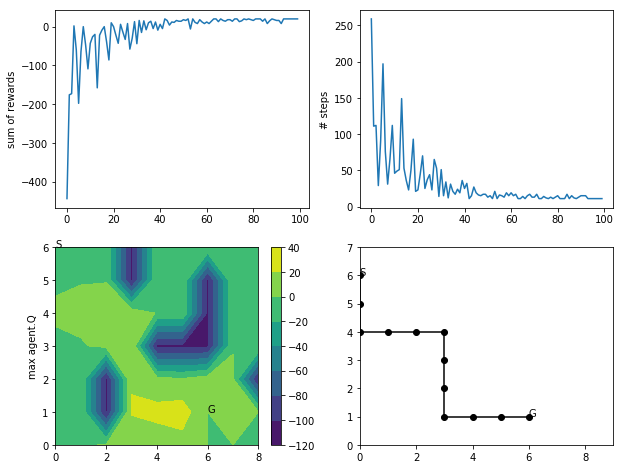

In [21]:
plot_train(agent, rtrace, steps, trace, start)

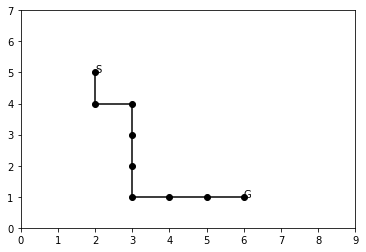

In [22]:
test_start = [1,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

In [169]:
#Case 2

agent = RLAgentMaze(env)
start = [0,0]
rtrace, steps, trace = agent.train(start,   
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

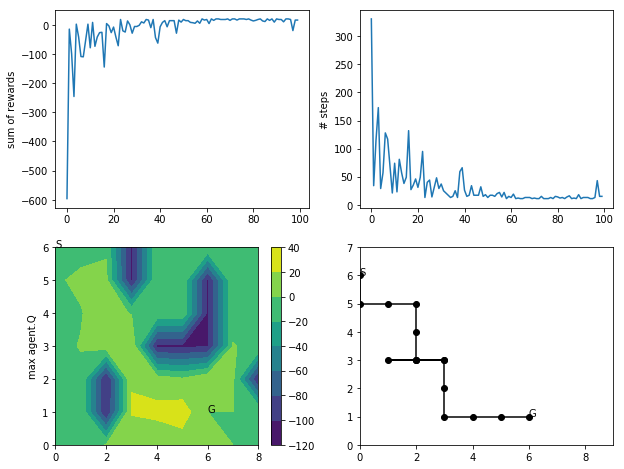

In [170]:
plot_train(agent, rtrace, steps, trace, start)

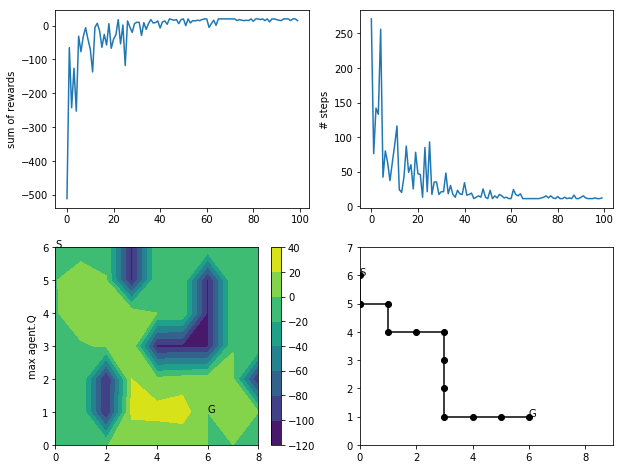

In [172]:
#Case 3

agent = RLAgentMaze(env)
start = [0,0]
rtrace, steps, trace = agent.train(start,
                                   gamma = 0.99,
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace, start)

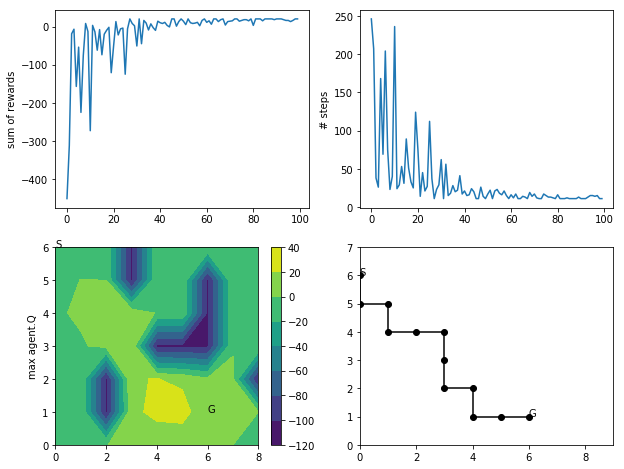

In [175]:
#Case 4

agent = RLAgentMaze(env)
start = [0,0]
rtrace, steps, trace = agent.train(start,
                                   alpha = 0.1,
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace, start)

From the various results its clear that case #3 provides a better output where the parameters used are gamma, epsilor, maxiter and maxsteps. The reason is because the rewards all tend to hit maximum with relatively lower number of steps. This makes it an ideal combination.

## AGENT BLACKJACK 

In [164]:
#Case 1

agent_black = RLAgentBlackJack(env1)
start = [0,0]
rtrace = agent_black.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100,
                                )

Win % : 0.35
Draw % : 0.05
Lose % : 0.6


In [165]:
import matplotlib.pyplot as histpy
    
def plot_train_blackjack(agent, rtrace):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221) 
    plt.plot(rtrace)
    plt.ylabel("sum of rewards")

def plothist_train_blackjack(agent, rtrace):
    num_bins = 3
    n, bins, patches = histpy.hist(rtrace, num_bins, facecolor='blue', alpha=1)
    histpy.show()


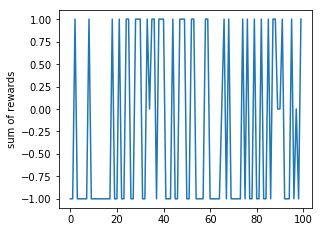

In [166]:
plot_train_blackjack(agent_black, rtrace)

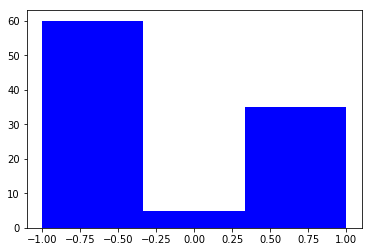

In [167]:
plothist_train_blackjack(agent_black, rtrace)

In [176]:
#Case 2

agent_black = RLAgentBlackJack(env1)
start = [0,0]
rtrace = agent_black.train(start,  
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100,
                                )

Win % : 0.43
Draw % : 0.06
Lose % : 0.51


In [182]:
#Case 3

agent_black = RLAgentBlackJack(env1)
start = [0,0]
rtrace = agent_black.train(start, 
                                   gamma=0.99,
                                   epsilon=0.1, 
                                   maxiter=100,
                                )

Win % : 0.28
Draw % : 0.03
Lose % : 0.69


In [186]:
#Case 4

agent_black = RLAgentBlackJack(env1)
start = [0,0]
rtrace = agent_black.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   maxiter=100,
                                )

Win % : 0.34
Draw % : 0.03
Lose % : 0.63


From the various results its clear that case #2 provides a better output where the parameters used are alpha, epsilon and maxiter. The reason is because the win percentage is maximum under this combination. Also maxsteps is neglected altogether as it doesn't really impact the outcome given that it solely depends on the win rate.  

## Analysis

MAZE : From the various Maze results, we could see the maximum reward curve is achieved as the agent makes more attempts and learns and drastically the number of steps also decrease relatively. This is a sign of efficiency of implementing SARSA as the policies involved are static.

BLACKJACK : Conversely, as dynamic policies are created for blackjack, Q-learning produces better results with higher win rates and hence more rewards.

# Conclusion

Thus through this assignment, I have become familiar with Reinforced Learning and also brings out the thin yet prominent difference between SARSA and Q-Learning and helped me understand when and where to use the approriate algorithm.